In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('../../../02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [4]:
diabetes.head()


,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
 diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [12]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [15]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [20]:
import matplotlib.pyplot as plot
%matplotlib inline

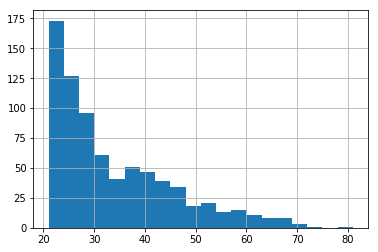

In [21]:
diabetes['Age'].hist(bins=20)

In [22]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [23]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

## TRAIN TEST SPLIT

In [24]:
x_data = diabetes.drop('Class', axis=1)

In [25]:
labels = diabetes['Class']

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [32]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [33]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp3kadpkq_', '_session_config': None, '_save_summary_steps': 100}


In [34]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp3kadpkq_/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 86.7711
INFO:tensorflow:loss = 7.771785, step = 101 (1.171 sec)
INFO:tensorflow:global_step/sec: 88.1067
INFO:tensorflow:loss = 4.299133, step = 201 (1.150 sec)
INFO:tensorflow:global_step/sec: 92.7417
INFO:tensorflow:loss = 5.8507333, step = 301 (1.047 sec)
INFO:tensorflow:global_step/sec: 88.8343
INFO:tensorflow:loss = 6.5657496, step = 401 (1.134 sec)
INFO:tensorflow:global_step/sec: 91.6372
INFO:tensorflow:loss = 6.357926, step = 501 (1.127 sec)
INFO:tensorflow:global_step/sec: 83.1378
INFO:tensorflow:loss = 9.501451, step = 601 (1.177 sec)
INFO:tensorflow:global_step/sec: 81.0324
INFO:tensorflow:loss = 4.290508, step = 701 (1.231 sec)
INFO:tensorflow:global_step/sec: 82.674
INFO:tensorflow:loss = 4.115338, step = 801 (1.209 sec)
INFO:tensorflow:global_step/sec: 82.7809
INFO:tensorflow:loss 

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-09-14-12:23:51
INFO:tensorflow:Restoring parameters from /tmp/tmp3kadpkq_/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-09-14-12:23:54
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7229437, accuracy_baseline = 0.64935064, auc = 0.80049384, auc_precision_recall = 0.63605237, average_loss = 0.52659154, global_step = 1000, label/mean = 0.35064936, loss = 5.0684433, prediction/mean = 0.3447597


In [37]:
results


{'accuracy': 0.7229437,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80049384,
 'auc_precision_recall': 0.63605237,
 'average_loss': 0.52659154,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0684433,
 'prediction/mean': 0.3447597}

In [38]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [39]:
predictions =  model.predict(pred_input_func)

In [41]:
my_pred =  list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmp3kadpkq_/model.ckpt-1000


In [42]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.49929836], dtype=float32),
  'logits': array([-0.00280654], dtype=float32),
  'probabilities': array([0.5007016 , 0.49929833], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5971841], dtype=float32),
  'logits': array([0.39374602], dtype=float32),
  'probabilities': array([0.40281585, 0.5971841 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34279373], dtype=float32),
  'logits': array([-0.65086913], dtype=float32),
  'probabilities': array([0.6572063, 0.3427937], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.31866667], dtype=float32),
  'logits': array([-0.75990605], dtype=float32),
  'probabilities': array([0.6813333 , 0.31866667], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpni_voom1', '_session_config': None, '_save_summary_steps': 100}


In [44]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [45]:
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_

In [46]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [47]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp376_e6ik', '_session_config': None, '_save_summary_steps': 100}


In [54]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp376_e6ik/model.ckpt.
INFO:tensorflow:loss = 7.064993, step = 1
INFO:tensorflow:global_step/sec: 278.719
INFO:tensorflow:loss = 3.948876, step = 101 (0.364 sec)
INFO:tensorflow:global_step/sec: 315.125
INFO:tensorflow:loss = 7.59583, step = 201 (0.313 sec)
INFO:tensorflow:global_step/sec: 299.439
INFO:tensorflow:loss = 3.9711218, step = 301 (0.342 sec)
INFO:tensorflow:global_step/sec: 281.873
INFO:tensorflow:loss = 2.5713687, step = 401 (0.350 sec)
INFO:tensorflow:global_step/sec: 280.449
INFO:tensorflow:loss = 6.859725, step = 501 (0.356 sec)
INFO:tensorflow:global_step/sec: 296.147
INFO:tensorflow:loss = 1.9064958, step = 601 (0.341 sec)
INFO:tensorflow:global_step/sec: 306.198
INFO:tensorflow:loss = 3.335676, step = 701 (0.323 sec)
INFO:tensorflow:global_step/sec: 297.829
INFO:tensorflow:loss = 5.79696, step = 801 (0.339 sec)
INFO:tensorflow:global_step/sec: 272.993
INFO:tensorflow:loss 

In [55]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test,batch_size=10,num_epochs=1,shuffle=False)

In [56]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-09-14-17:19:26
INFO:tensorflow:Restoring parameters from /tmp/tmp376_e6ik/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-09-14-17:19:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.8070781, auc_precision_recall = 0.67701817, average_loss = 0.52564955, global_step = 1000, label/mean = 0.35064936, loss = 5.059377, prediction/mean = 0.42661193


{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8070781,
 'auc_precision_recall': 0.67701817,
 'average_loss': 0.52564955,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.059377,
 'prediction/mean': 0.42661193}